<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/3_Keras_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!cp '/content/gdrive/My Drive/data/mnist_cnn_25_Epochs.h5' mnist_cnn_25_Epochs.h5

In [3]:
from tensorflow.keras.models import load_model

model = load_model('mnist_cnn_25_Epochs.h5')

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import numpy as np

# Reshape test data
print(x_test.shape)
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

# Predict all test set
pred = np.argmax(model.predict(x_test), axis=-1)


(10000, 28, 28)
(10000, 28, 28, 1)
313/313 [==============================] - 7s 21ms/step


In [6]:
import cv2
import numpy as np

# Create an array of indices for misclassified samples
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)

print(misclassified_indices)


(array([   8,   33,  124,  149,  193,  195,  233,  241,  247,  259,  290,
        300,  318,  320,  321,  340,  341,  352,  362,  412,  444,  445,
        448,  478,  479,  495,  502,  507,  511,  515,  531,  536,  547,
        551,  565,  578,  582,  591,  613,  619,  628,  659,  684,  689,
        691,  707,  717,  720,  726,  740,  791,  810,  839,  844,  898,
        939,  947,  950,  951,  965,  990, 1012, 1014, 1032, 1039, 1044,
       1062, 1073, 1096, 1107, 1112, 1114, 1173, 1181, 1192, 1194, 1198,
       1204, 1206, 1226, 1232, 1242, 1247, 1256, 1260, 1270, 1272, 1283,
       1289, 1299, 1319, 1326, 1328, 1337, 1378, 1393, 1413, 1440, 1444,
       1467, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1569, 1581, 1609,
       1621, 1634, 1671, 1681, 1709, 1716, 1717, 1718, 1740, 1754, 1772,
       1790, 1850, 1857, 1878, 1883, 1901, 1911, 1917, 1938, 1940, 1941,
       1952, 1970, 1981, 1984, 2016, 2024, 2033, 2035, 2040, 2043, 2044,
       2053, 2070, 2093, 2098, 2109, 2110, 2118, 2

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="", image=None, size=6):
  if image.any():
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("Image not found")



1/1 [==============================] - 0s 35ms/step


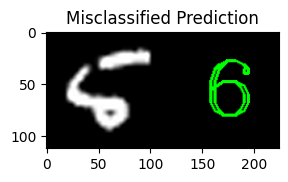

1/1 [==============================] - 0s 35ms/step


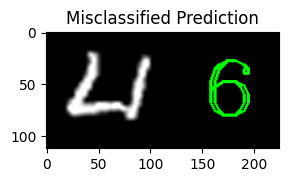

1/1 [==============================] - 0s 34ms/step


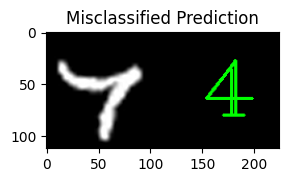

1/1 [==============================] - 0s 33ms/step


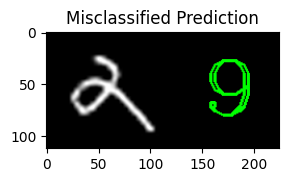

1/1 [==============================] - 0s 32ms/step


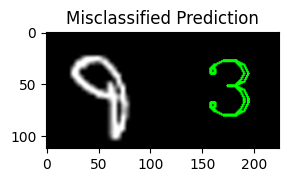

1/1 [==============================] - 0s 32ms/step


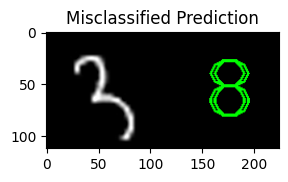

1/1 [==============================] - 0s 25ms/step


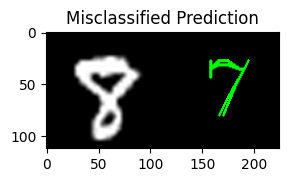

1/1 [==============================] - 0s 22ms/step


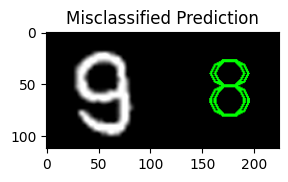

1/1 [==============================] - 0s 22ms/step


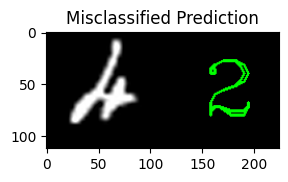

1/1 [==============================] - 0s 22ms/step


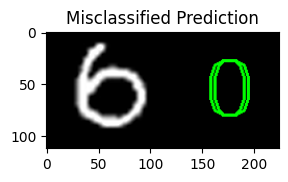

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_im):
  BLACK =  [0,0,0]
  # Expand original image
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
  # Convert grayscale to color
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  # Insert text to image
  cv2.putText(expanded_image, str(pred), (150,80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
  # Show image
  imshow(name, expanded_image)


for i in range(0, 10):
  input_im = x_test[misclassified_indices[0][i]]
  # resize image
  imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
  # reshape for input to the network
  input_im = input_im.reshape(1,28,28,1)
  # get prediction
  res = str(np.argmax(model.predict(input_im), axis=-1)[0])
  
  draw_test("Misclassified Prediction", res, np.uint8(imageL))
